In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("TAIPEI_diabetes.csv")

In [3]:
print("Loaded data with shape:", df.shape)

Loaded data with shape: (15000, 10)


In [4]:
df.head(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


In [5]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [6]:
df.columns.tolist()

['PatientID',
 'Pregnancies',
 'PlasmaGlucose',
 'DiastolicBloodPressure',
 'TricepsThickness',
 'SerumInsulin',
 'BMI',
 'DiabetesPedigree',
 'Age',
 'Diabetic']

In [7]:
if 'PatientID' in df.columns:
    df.drop(columns=['PatientID'], inplace=True)

In [8]:
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [9]:
df.isnull()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [11]:
import numpy as np

# Columns where 0 does NOT make sense
invalid_zero_cols = ['PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI']

# Replace 0s with NaN
for col in invalid_zero_cols:
    df[col] = df[col].replace(0, np.nan)

In [12]:
print("Missing values after replacing 0s:\n", df.isnull().sum())

Missing values after replacing 0s:
 Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


In [13]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


In [14]:
df.duplicated().sum()

0

In [15]:
df.head()


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


## 1. Class Distribution
Let's check how many people are diabetic (1) and non-diabetic (0).


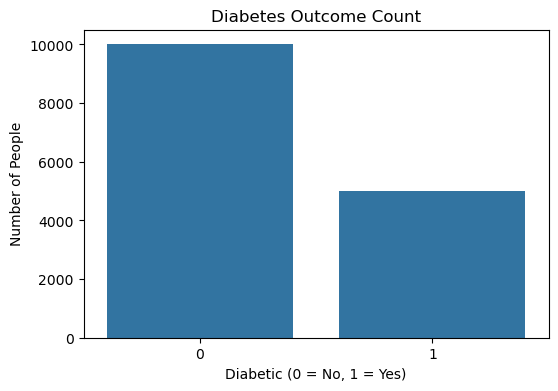

In [17]:
# Show how many people are diabetic vs not
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetic', data=df)
plt.title("Diabetes Outcome Count")
plt.xlabel("Diabetic (0 = No, 1 = Yes)")
plt.ylabel("Number of People")
plt.show()


## 2. Feature Correlation
We'll use a heatmap to see how features are related to each other and to the `Diabetic` target.

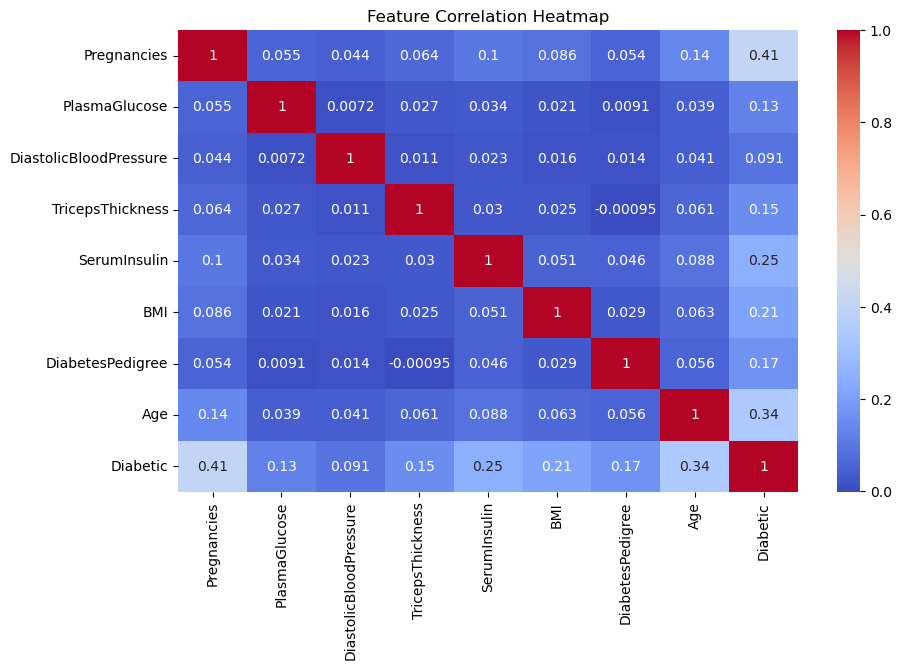

In [19]:
# Show how all features relate to each other
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()



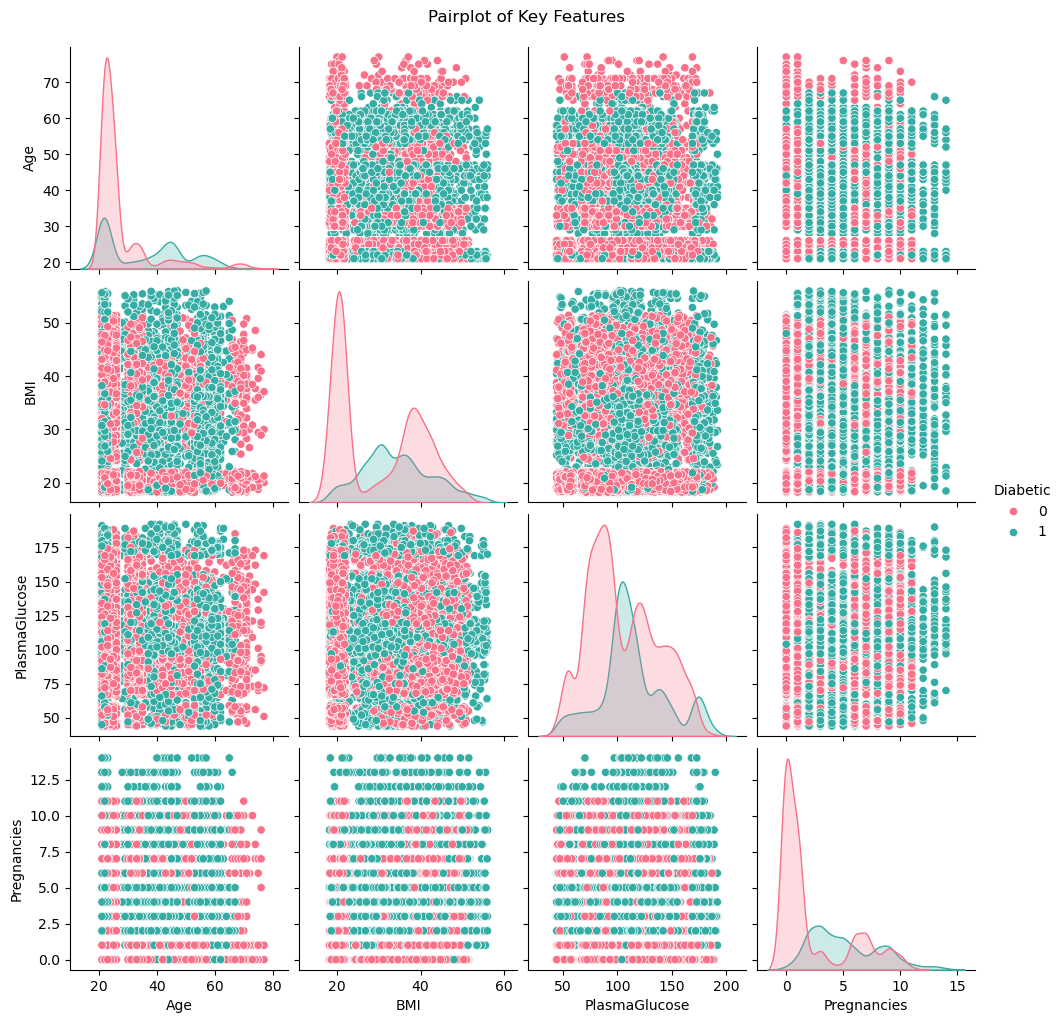

In [20]:
selected_features = ['Age', 'BMI', 'PlasmaGlucose', 'Pregnancies', 'Diabetic']
sns.pairplot(df[selected_features], hue='Diabetic', palette='husl')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()





## 3. Feature Distributions
Now let's look at the distribution of each feature, split by diabetic status.


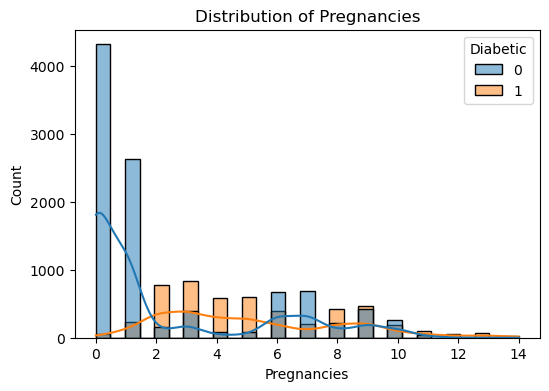

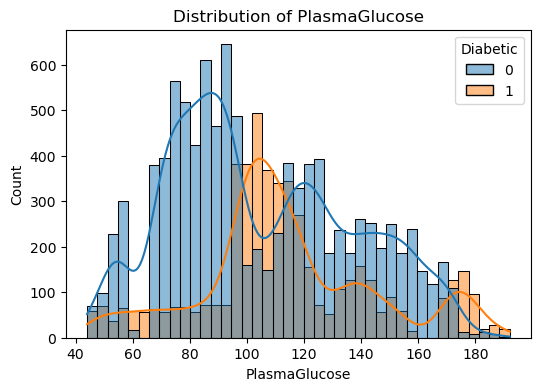

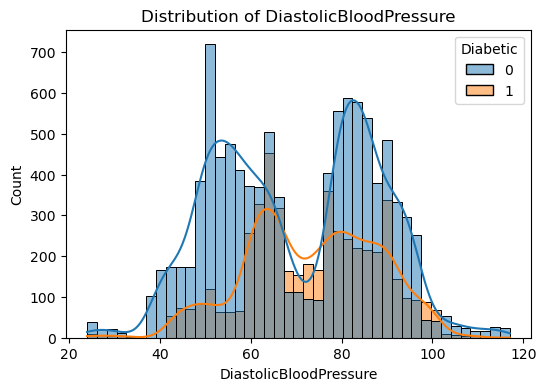

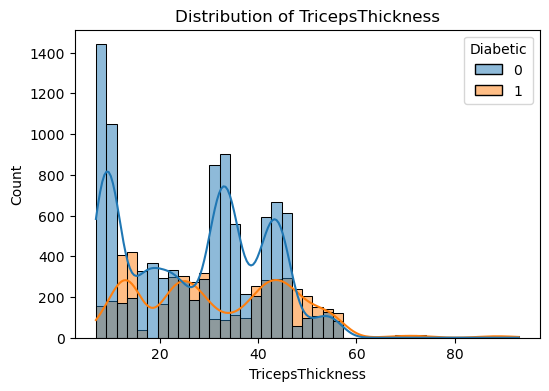

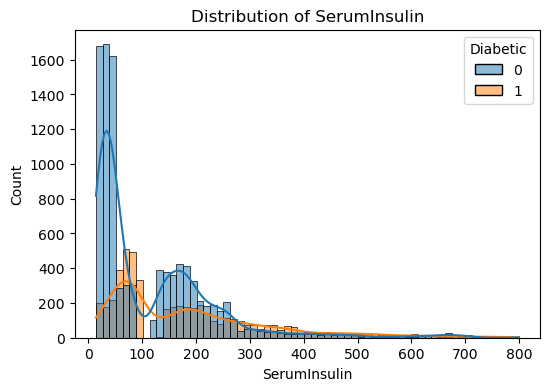

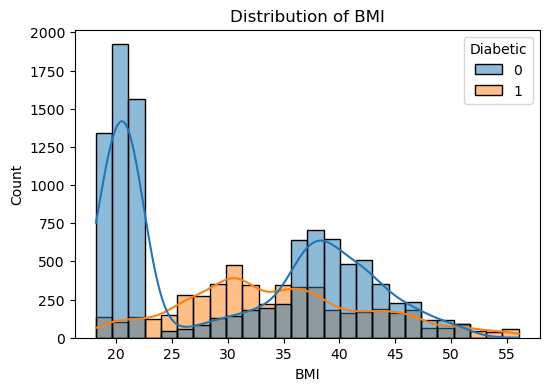

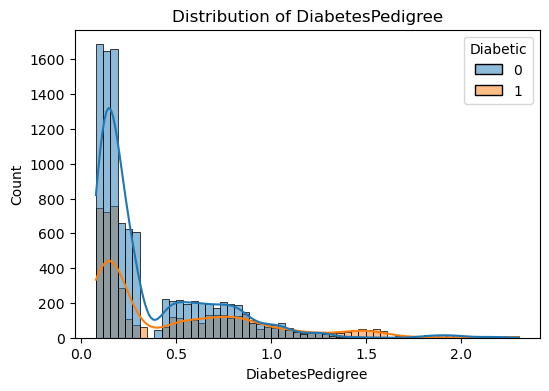

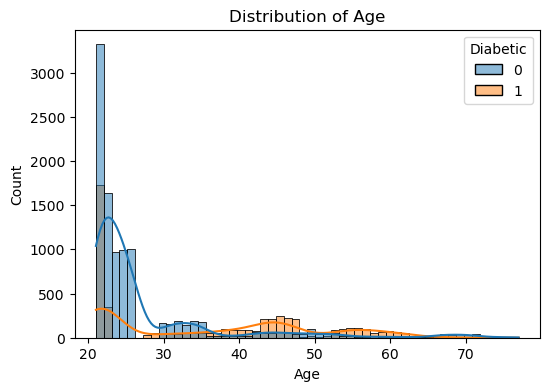

In [22]:
# Show how each feature is distributed, split by diabetes status
columns = df.columns.tolist()
columns.remove('Diabetic')  # We won't plot this column

for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Diabetic', kde=True)
    plt.title("Distribution of " + col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


## 4. Boxplots for Outliers
#We'll use boxplots to compare the spread of values between diabetic and non-diabetic patients.


C:\Users\njaya\AppData\Local\Temp\ipykernel_17304\2193724551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetic', y=col, data=df, palette='Set2')


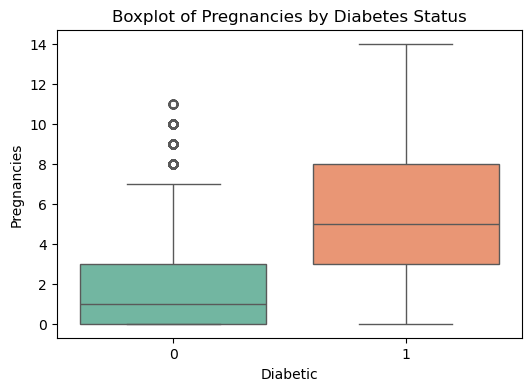

C:\Users\njaya\AppData\Local\Temp\ipykernel_17304\2193724551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetic', y=col, data=df, palette='Set2')


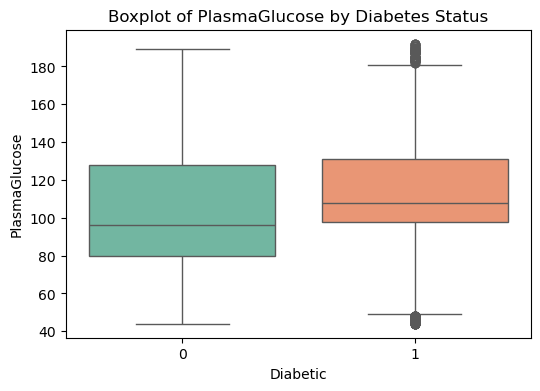

C:\Users\njaya\AppData\Local\Temp\ipykernel_17304\2193724551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetic', y=col, data=df, palette='Set2')


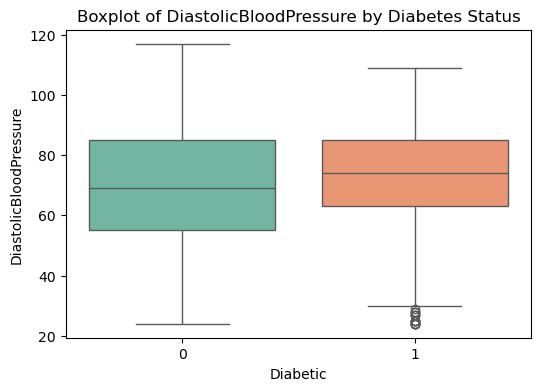

C:\Users\njaya\AppData\Local\Temp\ipykernel_17304\2193724551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetic', y=col, data=df, palette='Set2')


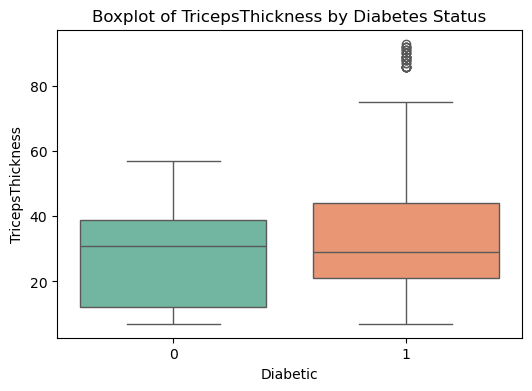

C:\Users\njaya\AppData\Local\Temp\ipykernel_17304\2193724551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetic', y=col, data=df, palette='Set2')


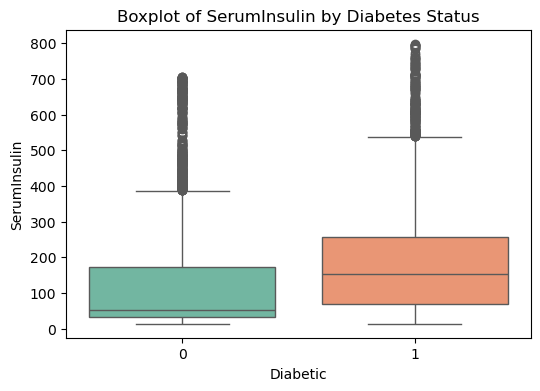

C:\Users\njaya\AppData\Local\Temp\ipykernel_17304\2193724551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetic', y=col, data=df, palette='Set2')


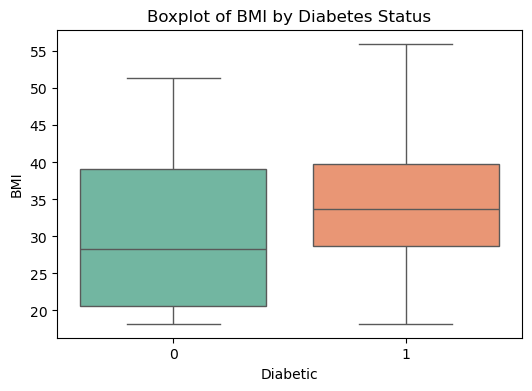

C:\Users\njaya\AppData\Local\Temp\ipykernel_17304\2193724551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetic', y=col, data=df, palette='Set2')


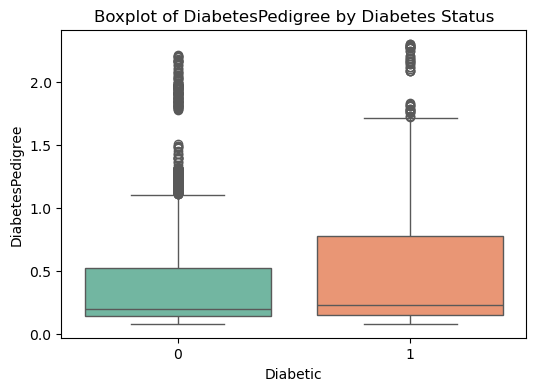

C:\Users\njaya\AppData\Local\Temp\ipykernel_17304\2193724551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetic', y=col, data=df, palette='Set2')


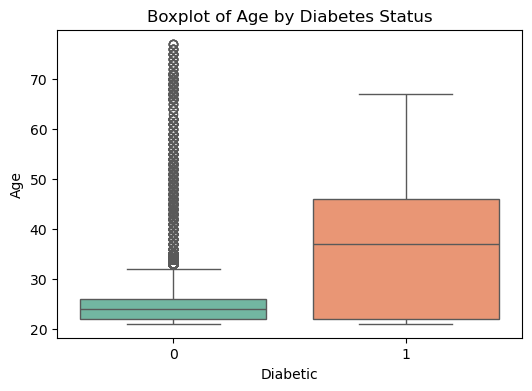

In [24]:
# Compare feature values between Diabetic and Non-Diabetic
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Diabetic', y=col, data=df, palette='Set2')
    plt.title("Boxplot of " + col + " by Diabetes Status")
    plt.xlabel("Diabetic")
    plt.ylabel(col)
    plt.show()






## 5. Mean Feature Values by Class
Let's see the average values for each feature, grouped by diabetic status.


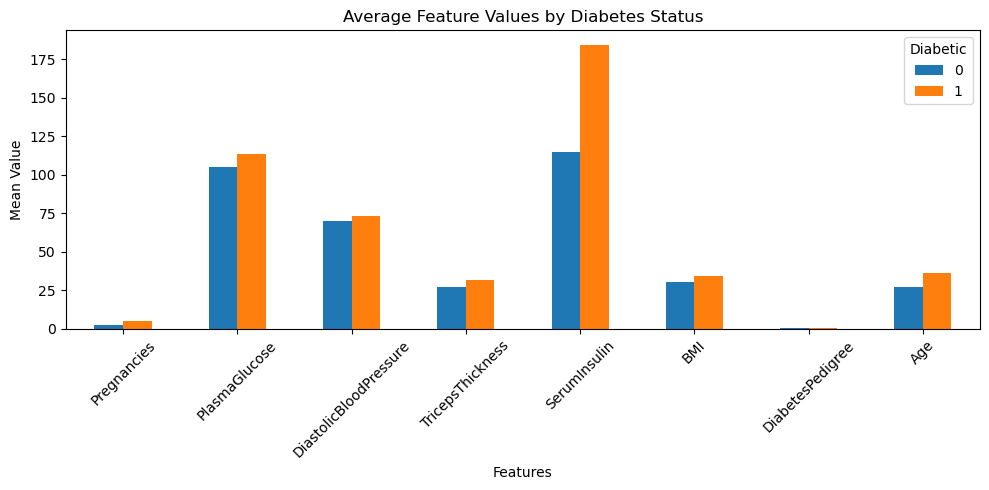

In [26]:
# Compare mean feature values for diabetic and non-diabetic
mean_values = df.groupby('Diabetic').mean()

# Transpose for easier plotting
mean_values.T.plot(kind='bar', figsize=(10, 5))
plt.title("Average Feature Values by Diabetes Status")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(title='Diabetic')
plt.tight_layout()
plt.show()
